<a href="https://colab.research.google.com/github/jc890/python/blob/master/casestudy003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruit-and-vegetable-image-recognition' dataset.
Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


Dataset paths and categories defined.
Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 1,534,273 (5.85 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

Epoch 1/10
 8/86 ━━━━━━━━━━━━━━━━━━━━ 2:08 2s/step - accuracy: 0.5918 - loss: 0.7120

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6736 - loss: 0.6195 - val_accuracy: 0.7917 - val_loss: 0.4563 - learning_rate: 1.0000e-04
Epoch 2/10
 1/86 ━━━━━━━━━━━━━━━━━━━━ 1:14 874ms/step - accuracy: 0.7500 - loss: 0.4987

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.7500 - loss: 0.4987 - val_accuracy: 0.7986 - val_loss: 0.4483 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.7971 - loss: 0.4341 - val_accuracy: 0.8194 - val_loss: 0.4375 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.8438 - loss: 0.4950 - val_accuracy: 0.8299 - val_loss: 0.4233 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.8414 - loss: 0.3622 - val_accuracy: 0.8507 - val_loss: 0.3623 - learning_rate: 1.0000e-04
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.7812 - loss: 0.4876 - val_accuracy: 0.8611 - val_loss: 0.3622 - learning_rate: 1.0000e-04
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8651 - loss: 0.3129 - val_accuracy: 0.8750 - val_loss: 0.3280 - learning_rate: 1.0000e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.8125 - l

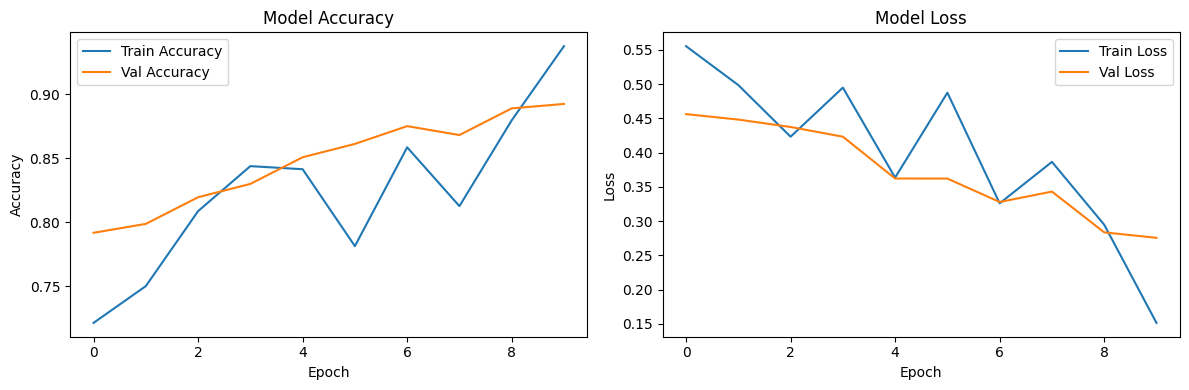

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
              precision    recall  f1-score   support

      Fruits       0.85      0.85      0.85        99
  Vegetables       0.93      0.93      0.93       220

    accuracy                           0.91       319
   macro avg       0.89      0.89      0.89       319
weighted avg       0.91      0.91      0.91       319



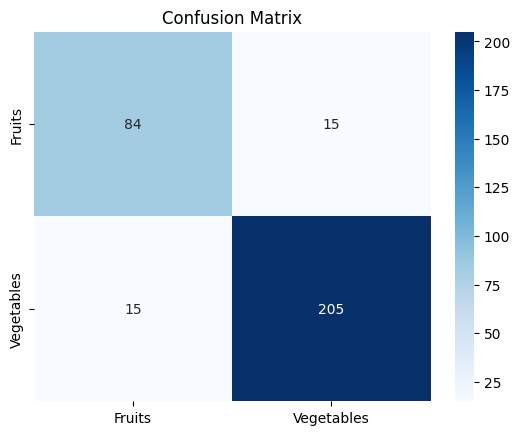

Model saved as fruit_veg_classifier_mobilenetv2.h5


In [22]:
# Classifying Fruits and Vegetables Using Image Classification with MobileNetV2

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Step 2: Define Categories and Dataset Paths
fruits = ['banana', 'apple', 'pear', 'grapes', 'orange', 'kiwi', 'watermelon', 'pomegranate', 'pineapple', 'mango']
vegetables = ['cucumber', 'carrot', 'capsicum', 'onion', 'potato', 'lemon', 'tomato', 'radish', 'beetroot', 'cabbage',
              'lettuce', 'spinach', 'soy bean', 'cauliflower', 'bell pepper', 'chilli pepper', 'turnip', 'corn', 'sweetcorn',
              'sweet potato', 'paprika', 'jalapeno', 'ginger', 'garlic', 'peas', 'eggplant']

train_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
val_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'
test_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/test'

# Function to map class names to binary labels
def get_binary_label(class_name):
    if class_name.lower() in [f.lower() for f in fruits]:
        return 0  # Fruits
    elif class_name.lower() in [v.lower() for v in vegetables]:
        return 1  # Vegetables
    else:
        return None  # Skip unknown classes

print('Dataset paths and categories defined.')

# Step 3: Data Augmentation and Generators
img_height, img_width = 128, 128  # Match MobileNetV2 input shape
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Map multi-class labels to binary (Fruits: 0, Vegetables: 1)
def map_to_binary_labels(generator):
    original_indices = generator.class_indices
    original_filenames = generator.filenames
    original_classes = generator.classes

    binary_mapping = {k: get_binary_label(k) for k in original_indices.keys()}
    binary_labels = []
    valid_filenames = []
    for idx, fname in zip(original_classes, original_filenames):
        class_name = [k for k, v in original_indices.items() if v == idx][0]
        binary_label = binary_mapping[class_name]
        if binary_label is not None:
            binary_labels.append(binary_label)
            valid_filenames.append(fname)

    binary_labels = np.array(binary_labels)
    generator.classes = binary_labels
    generator.filenames = valid_filenames
    generator.samples = len(binary_labels)
    generator.class_indices = {'Fruits': 0, 'Vegetables': 1}
    generator.n = len(binary_labels)
    generator.index_array = None  # Reset index array

    return generator

train_generator = map_to_binary_labels(train_generator)
val_generator = map_to_binary_labels(val_generator)
test_generator = map_to_binary_labels(test_generator)

# Step 4: Build the MobileNetV2 Model
mobile_net_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers except the last 20
mobile_net_model.trainable = True
for layer in mobile_net_model.layers[:-20]:
    layer.trainable = False

model = Sequential([
    mobile_net_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # Binary classification
    metrics=['accuracy']
)

model.summary()

# Step 5: Define Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-7
)

callbacks = [early_stop, reduce_lr]

# Step 6: Train the Model
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // batch_size),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=max(1, val_generator.samples // batch_size),
    callbacks=callbacks,
    verbose=1
)

# Step 7: Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# Save history as DataFrame
result_mobile_net_model = pd.DataFrame(history.history)

# Step 8: Evaluate the Model on Test Set
test_generator.reset()
preds = model.predict(test_generator)
preds = np.round(preds).astype(int).flatten()

true_labels = test_generator.classes[:len(preds)]

print(classification_report(true_labels, preds, target_names=['Fruits', 'Vegetables']))

cm = confusion_matrix(true_labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fruits', 'Vegetables'], yticklabels=['Fruits', 'Vegetables'])
plt.title('Confusion Matrix')
plt.show()

# Step 9: Save the Model
model.save('fruit_veg_classifier_mobilenetv2.h5')
print('Model saved as fruit_veg_classifier_mobilenetv2.h5')

Dataset paths and categories defined.
Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Generator samples after mapping: 2780
Generator samples after mapping: 313
Generator samples after mapping: 319


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 1,534,273 (5.85 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6490 - loss: 0.6667 - val_accuracy: 0.7951 - val_loss: 0.4448 - learning_rate: 1.0000e-04
Epoch 2/10
 1/86 ━━━━━━━━━━━━━━━━━━━━ 1:10 832ms/step - accuracy: 0.8125 - loss: 0.3536

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.8125 - loss: 0.3536 - val_accuracy: 0.7812 - val_loss: 0.4473 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7921 - loss: 0.4430 - val_accuracy: 0.8403 - val_loss: 0.3627 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.8125 - loss: 0.4122 - val_accuracy: 0.8333 - val_loss: 0.3836 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8378 - loss: 0.3591 - val_accuracy: 0.8681 - val_loss: 0.3286 - learning_rate: 1.0000e-04
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.8125 - loss: 0.3650 - val_accuracy: 0.8646 - val_loss: 0.3297 - learning_rate: 1.0000e-04
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8638 - loss: 0.3048 - val_accuracy: 0.8785 - val_loss: 0.3157 - learning_rate: 1.0000e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.8125 - l

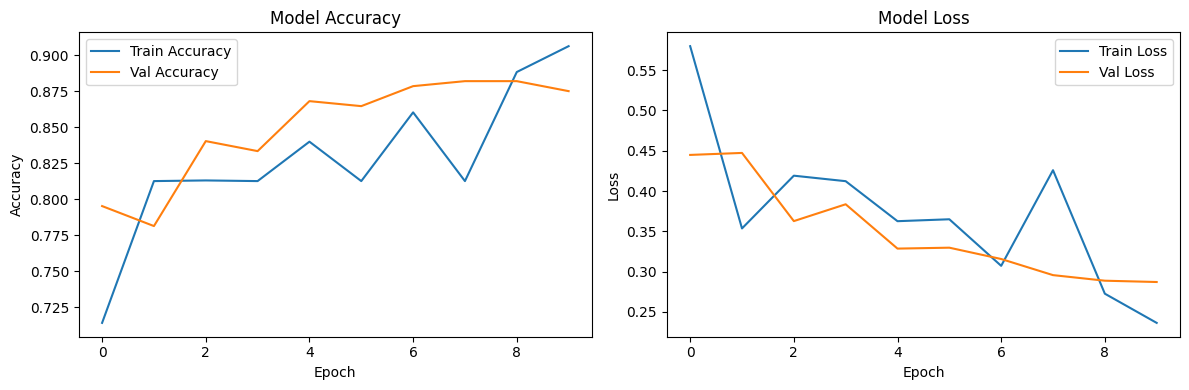

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
              precision    recall  f1-score   support

      Fruits       0.86      0.81      0.83        99
  Vegetables       0.92      0.94      0.93       220

    accuracy                           0.90       319
   macro avg       0.89      0.87      0.88       319
weighted avg       0.90      0.90      0.90       319



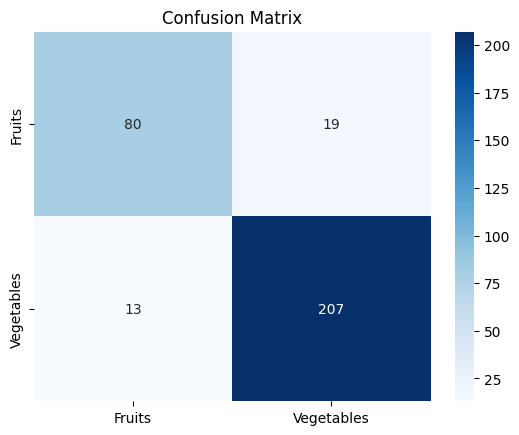

Model saved as fruit_veg_classifier_mobilenetv2.keras


In [25]:
# Classifying Fruits and Vegetables Using Image Classification with MobileNetV2

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from PIL import Image
import warnings

# Suppress PIL warnings
warnings.filterwarnings('ignore', category=UserWarning, module='PIL')

# Step 2: Define Categories and Dataset Paths
fruits = ['banana', 'apple', 'pear', 'grapes', 'orange', 'kiwi', 'watermelon', 'pomegranate', 'pineapple', 'mango']
vegetables = ['cucumber', 'carrot', 'capsicum', 'onion', 'potato', 'lemon', 'tomato', 'radish', 'beetroot', 'cabbage',
              'lettuce', 'spinach', 'soy bean', 'cauliflower', 'bell pepper', 'chilli pepper', 'turnip', 'corn', 'sweetcorn',
              'sweet potato', 'paprika', 'jalapeno', 'ginger', 'garlic', 'peas', 'eggplant']

train_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
val_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'
test_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/test'

# Function to map class names to binary labels
def get_binary_label(class_name):
    if class_name.lower() in [f.lower() for f in fruits]:
        return 0  # Fruits
    elif class_name.lower() in [v.lower() for v in vegetables]:
        return 1  # Vegetables
    else:
        return None  # Skip unknown classes

print('Dataset paths and categories defined.')

# Step 3: Data Augmentation and Generators
img_height, img_width = 128, 128
batch_size = 32

# Custom preprocessing to handle palette images
def preprocess_image(image):
    # Check if the input is a PIL Image instance
    if isinstance(image, Image.Image):
        if image.mode != 'RGB':
            image = image.convert('RGB')
        return np.array(image)
    # If it's already a numpy array, assume it's in a suitable format or handle as needed
    elif isinstance(image, np.ndarray):
        # You might need additional logic here if the numpy array is not in RGB
        return image
    else:
        # Handle unexpected input types
        raise TypeError("Input to preprocess_image must be a PIL Image or a NumPy array")


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Map multi-class labels to binary (Fruits: 0, Vegetables: 1)
def map_to_binary_labels(generator):
    original_indices = generator.class_indices
    original_filenames = generator.filenames
    original_classes = generator.classes

    binary_mapping = {k: get_binary_label(k) for k in original_indices.keys()}
    binary_labels = []
    valid_filenames = []
    for idx, fname in zip(original_classes, original_filenames):
        class_name = [k for k, v in original_indices.items() if v == idx][0]
        binary_label = binary_mapping[class_name]
        if binary_label is not None:
            binary_labels.append(binary_label)
            valid_filenames.append(fname)

    binary_labels = np.array(binary_labels)
    generator.classes = binary_labels
    generator.filenames = valid_filenames
    generator.samples = len(binary_labels)
    generator.class_indices = {'Fruits': 0, 'Vegetables': 1}
    generator.n = len(binary_labels)
    generator.index_array = None  # Reset index array

    # Print sample counts for debugging
    print(f"Generator samples after mapping: {generator.samples}")

    return generator

train_generator = map_to_binary_labels(train_generator)
val_generator = map_to_binary_labels(val_generator)
test_generator = map_to_binary_labels(test_generator)

# Step 4: Build the MobileNetV2 Model
mobile_net_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers except the last 20
mobile_net_model.trainable = True
for layer in mobile_net_model.layers[:-20]:
    layer.trainable = False

model = Sequential([
    mobile_net_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 5: Define Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-7
)

callbacks = [early_stop, reduce_lr]

# Step 6: Train the Model
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // batch_size),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=max(1, val_generator.samples // batch_size),
    callbacks=callbacks,
    verbose=1
)

# Step 7: Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# Save history as DataFrame
result_mobile_net_model = pd.DataFrame(history.history)

# Step 8: Evaluate the Model on Test Set
test_generator.reset()
preds = model.predict(test_generator)
preds = np.round(preds).astype(int).flatten()

true_labels = test_generator.classes[:len(preds)]

print(classification_report(true_labels, preds, target_names=['Fruits', 'Vegetables']))

cm = confusion_matrix(true_labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fruits', 'Vegetables'], yticklabels=['Fruits', 'Vegetables'])
plt.title('Confusion Matrix')
plt.show()

# Step 9: Save the Model
model.save('fruit_veg_classifier_mobilenetv2.keras')  # Use native Keras format
print('Model saved as fruit_veg_classifier_mobilenetv2.keras')